# Сверточная нейронная сеть и методы регуляризации с TensorFlow и Keras

На этом блокноте  мы поговорим о 
###  CNN и методах регуляризации
, доступных в API TensorFlow Keras. Сначала я попытаюсь дать вам интуитивное представление о том, что такое сверточная нейронная сеть, а затем познакомлю вас с методами регуляризации.

Но прежде чем мы начнем
Я предполагаю, что читатели этой статьи знакомы со следующим:

Нейронная сеть
Основы TensorFlow
Но даже если это не так, не волнуйтесь — я постараюсь упростить понимание, чтобы вы смогли понять эти концепции.

Сверточная нейронная сеть


In [1]:
!pip install Keras-Preprocessing

In [1]:
import os
import tensorflow as tf
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from multiprocessing import Pool
import matplotlib.pyplot as plt

In [2]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,10))
    ax[0].set_title('CNN-Loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('CNN-Accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [3]:
data_dir = 'E:/Dataset_Pepper/'
augs_gen = ImageDataGenerator(
    rescale=1./255,        
    horizontal_flip=True,
    height_shift_range=.2,
    vertical_flip = True,
    validation_split = 0.2
)  

train_gen = augs_gen.flow_from_directory(
    data_dir,
    target_size = (224,224),
    batch_size=32,
    class_mode = 'categorical',
    shuffle=True,
    subset = 'training'
)

val_gen = augs_gen.flow_from_directory(
    data_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    subset = 'validation'
)

Found 3122 images belonging to 2 classes.
Found 779 images belonging to 2 classes.


In [4]:
model = tf.keras.models.Sequential([
    # layer 1
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3), use_bias=True),
    tf.keras.layers.MaxPooling2D(2,2),
    # layer 2
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', use_bias=True),
    tf.keras.layers.MaxPooling2D(2,2),
    # layer 3
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', use_bias=True),
    tf.keras.layers.MaxPooling2D(2,2),
    # layer 4
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', use_bias=True),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    # layer 5
    tf.keras.layers.Dense(512, activation = 'relu', use_bias=True),
    # layer 6
    tf.keras.layers.Dense(2, activation='softmax', use_bias=True)
    
])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

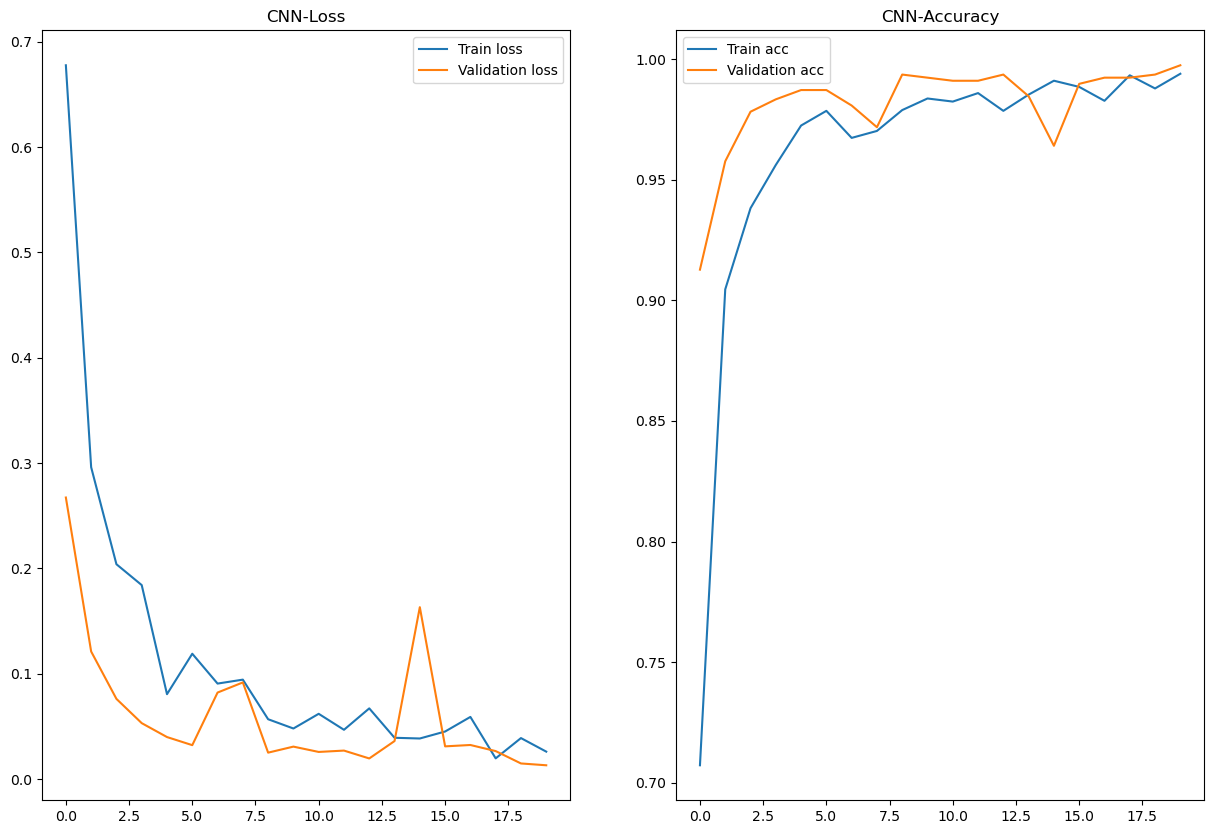

In [5]:
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(train_gen, epochs=20, validation_data = val_gen, verbose = 1)
show_final_history(history)


In [6]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(10,7))
    ax[0].set_title('Ошибка модели-CNN ')
    ax[0].plot(history.epoch, history.history["loss"], label="Ошибка при обучения модели")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Ошибка при тестировании")
    ax[1].set_title('Точность модели-CNN')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Точность при обучении ")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Точность при тестировании")
    ax[0].legend()
    ax[1].legend()

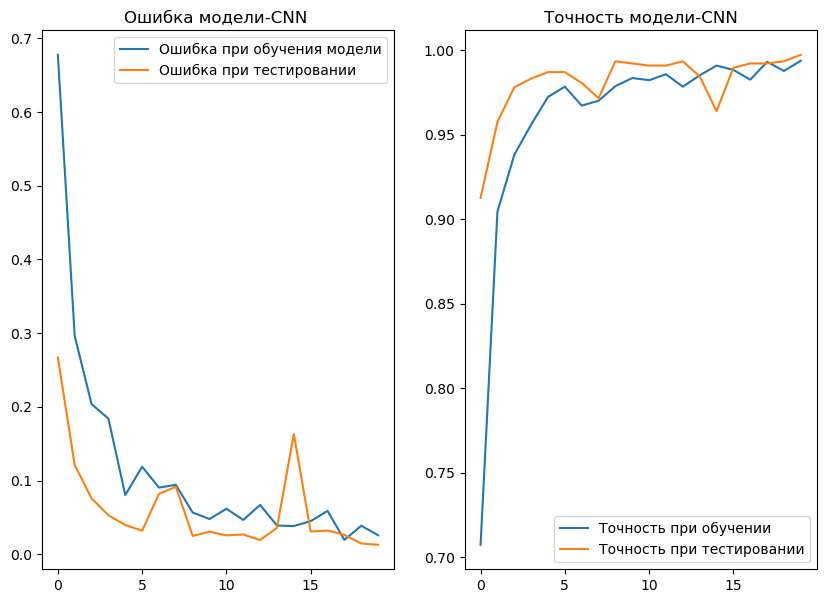

In [7]:
show_final_history(history)

In [8]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,10))
    ax[0].set_title('CNN-Loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('CNN-Accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

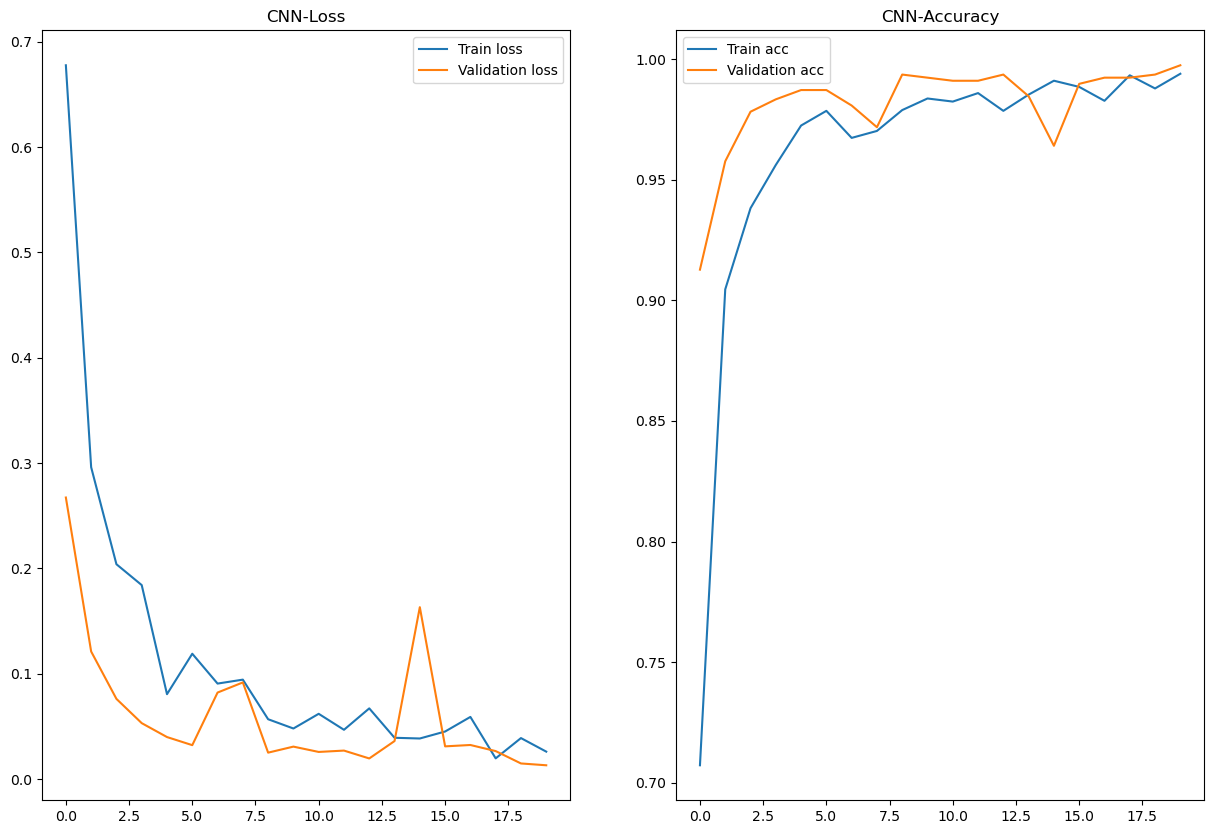

In [9]:
show_final_history(history)

Теперь, когда вы знаете, как мы будем кодировать модель и отображать архитектуру, давайте приступим к теории и коду регуляризованных моделей.
## Регуляризация L1
Для регуляризации L1 вам необходимо добавить следующее значение к функции стоимости L (x,y) вашей модели. 

In [6]:
model_l1 = tf.keras.models.Sequential([
    # layer 1
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3), use_bias=True),
    tf.keras.layers.MaxPooling2D(2,2),
    # layer 2
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', use_bias=True),
    tf.keras.layers.MaxPooling2D(2,2),
    # layer 3
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', use_bias=True, kernel_regularizer =tf.keras.regularizers.l1( l=0.01) ),
    tf.keras.layers.MaxPooling2D(2,2),
    # layer 4
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', use_bias=True,kernel_regularizer =tf.keras.regularizers.l1( l=0.01)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    # layer 5
    tf.keras.layers.Dense(512, activation = 'relu', use_bias=True, kernel_regularizer =tf.keras.regularizers.l1( l=0.01)),
    # layer 6
    tf.keras.layers.Dense(3, activation='softmax', use_bias=True)
    
])


In [7]:
model_l1.summary()
model_l1.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history_l1 = model_l1.fit(train_gen, epochs=20, validation_data = val_gen, verbose = 1)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 128)     

In [12]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(10,7))
    ax[0].set_title('Ошибка модели-с регуляризацией в L1 ')
    ax[0].plot(history.epoch, history.history["loss"], label="Ошибка при обучения модели")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Ошибка при тестировании")
    ax[1].set_title('Точность модели-с регуляризацией в L1')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Точность при обучении ")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Точность при тестировании")
    ax[0].legend()
    ax[1].legend()

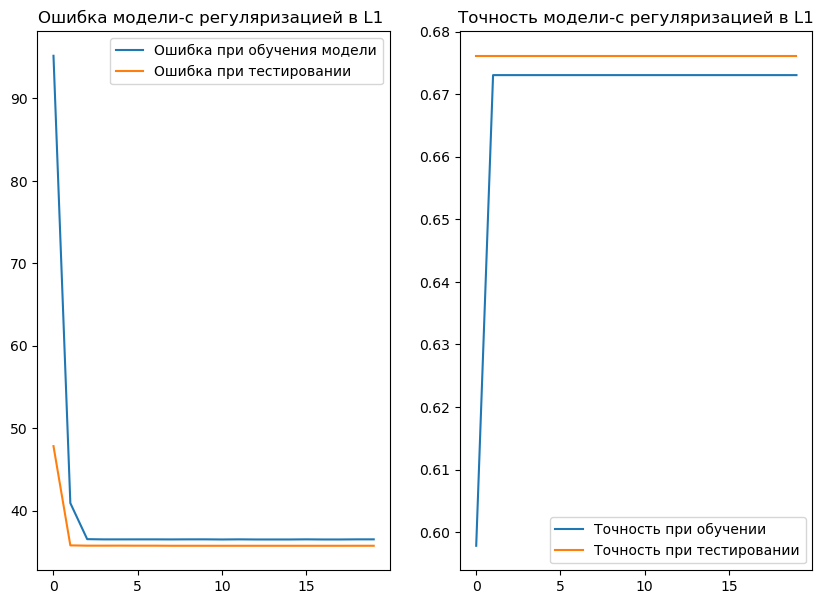

In [13]:
show_final_history(history_l1)

In [ ]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(10,7))
    ax[0].set_title('Model error - with regularization in L1 ')
    ax[0].plot(history.epoch, history.history["loss"], label="Error during model training")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Error during testing")
    ax[1].set_title('Model accuracy - with regularization in L1')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Accuracy in training ")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Test accuracy")
    ax[0].legend()
    ax[1].legend()

In [ ]:
show_final_history(history_l1)

После обучения в течение 20 эпох (циклов) мы наблюдаем очень странный график точности

Вы можете видеть, что потери очень велики, а точность модели очень низкая. Есть несколько возможных причин таких значений.

У нас есть набор данных, содержащий всего 2407 изображений, что очень мало. Итак, нашей модели не хватило данных для обучения.
Регуляризация L1 делает параметры тета разреженными, что означает, что значения в основном равны нулям.
3. Мы добавили слишком много регуляризаторов, что может привести к тому, что модель не будет соответствовать данным.

Есть 3 способа улучшить производительность модели

Используйте больше данных
Используйте другой метод регуляризации
Используйте меньше регуляризатора

В регуляризации L2 мы берем сумму всех параметров в квадрате и добавляем ее к разнице квадратов фактического результата и прогнозов. Так же, как и в L1, если вы увеличите значение лямбды, значение параметров уменьшится, поскольку L2 наложит штрафы на параметры. Разница в том, что веса не будут редкими, и мы получим гораздо лучшие значения точности по сравнению с L1.

In [8]:
model_l2 = tf.keras.models.Sequential([
    # layer 1
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3), use_bias=True),
    tf.keras.layers.MaxPooling2D(2,2),
    # layer 2
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', use_bias=True),
    tf.keras.layers.MaxPooling2D(2,2),
    # layer 3
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', use_bias=True, kernel_regularizer =tf.keras.regularizers.l2( l=0.01)),
    tf.keras.layers.MaxPooling2D(2,2),
    # layer 4
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', use_bias=True , kernel_regularizer =tf.keras.regularizers.l2( l=0.01)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    # layer 5
    tf.keras.layers.Dense(512, activation = 'relu', use_bias=True,  kernel_regularizer =tf.keras.regularizers.l2( l=0.01)),
    
    # layer 6
    tf.keras.layers.Dense(3, activation='softmax', use_bias=True)
    
])

tf.keras.regularizers.l2() обозначает регуляризаторы L2. Через 20 эпох графики выглядят так. Тренируйтесь, используя тот же шаг, что и раньше.

In [9]:
model_l2.summary()
model_l2.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history_l2 = model_l2.fit(train_gen, epochs=20, validation_data = val_gen, verbose = 1)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 26, 26, 128)     

In [16]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(10,7))
    ax[0].set_title('Ошибка модели- с регуляризацией в L2  ')
    ax[0].plot(history.epoch, history.history["loss"], label="Ошибка при обучения модели-в L2")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Ошибка при тестировании-в L2")
    ax[1].set_title('Точность модели-с регуляризацией в L2')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Точность при обучении- в L2 ")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Точность при тестировании- в L2")
    ax[0].legend()
    ax[1].legend()

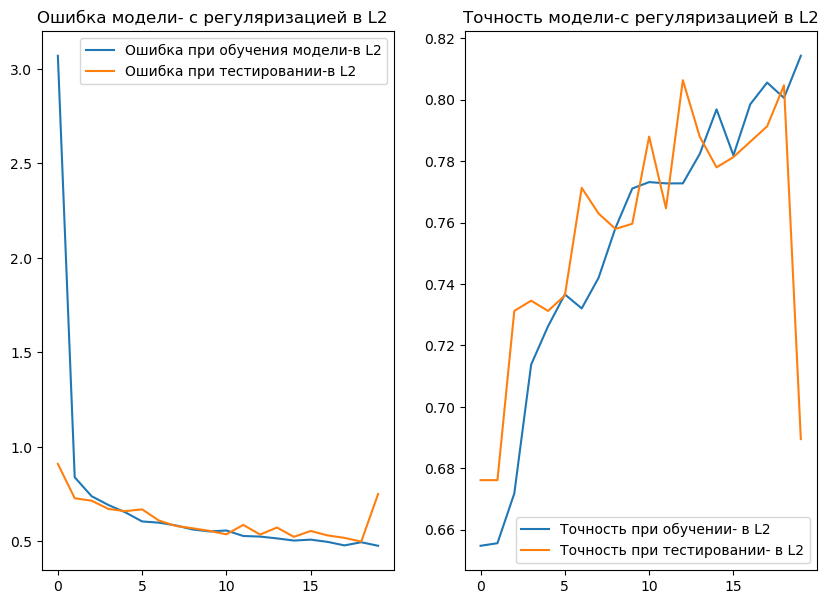

In [17]:
show_final_history(history_l2)

In [ ]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(10,7))
    ax[0].set_title('Model error - with regularization in L2  ')
    ax[0].plot(history.epoch, history.history["loss"], label="Error when training a model in L2")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Error during testing - in L2")
    ax[1].set_title('Model accuracy - with regularization in L2')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Accuracy during training - in L2 ")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Accuracy during testing - in L2")
    ax[0].legend()
    ax[1].legend()

In [ ]:
show_final_history(history_l2)

Поскольку параметры были не редкими, модель не подходила, и мы имеем низкие потери и высокую точность — именно то, что нам нужно.

Как именно наказывают L1 и L2?
Это связано с обратным распространением ошибки. Обратное распространение ошибки само по себе является отдельной темой, но основная идея проста.

На каждом этапе ваша модель делает прогнозы. Он находит разницу между фактическим результатом и прогнозом. Если разница не минимальна, модель должна сделать другой прогноз, который намного ближе к выходным данным. Чтобы делать разные прогнозы, модель должна иметь разные параметры, которые лучше предыдущих. Параметры обновляются путем определения градиента функции потерь на каждом шаге.

Таким образом регуляризаторы наказывают параметры модели.

Dropout — еще один метод регуляризации, широко используемый в моделях. Что он делает, так это удаляет некоторые случайные узлы в ваших слоях нейронной сети.

Таким образом, преимущество использования исключения заключается в том, что ни одному узлу в сети не будут назначены высокие значения параметров, в результате значения параметров будут рассредоточены, и выходные данные текущего слоя не будут зависеть от одного узла.

Архитектура модели такая:

In [18]:
model_drop = tf.keras.models.Sequential([
    # layer 1
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3), use_bias=True),
    tf.keras.layers.MaxPooling2D(2,2),
    # layer 2
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', use_bias=True),
    tf.keras.layers.MaxPooling2D(2,2),
    # layer 3
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', use_bias=True),
    tf.keras.layers.Dropout( 0.2),
    tf.keras.layers.MaxPooling2D(2,2),
    # layer 4
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', use_bias=True),    
    tf.keras.layers.Dropout( 0.2), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    # layer 5
    tf.keras.layers.Dense(512, activation = 'relu', use_bias=True),
    tf.keras.layers.Dropout( 0.2),
    # layer 6
    tf.keras.layers.Dense(3, activation='softmax', use_bias=True)
    
])

tf.keras.layers.Dropout(0.2) удаляет входные слои с вероятностью 0,2.

In [19]:
model_drop.summary()
model_drop.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history_drop = model_drop.fit(train_gen, epochs=20, validation_data = val_gen, verbose = 1)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 dropout (Dropout)           (None, 52, 52, 128)      

После обучения и визуализации с помощью приведенного выше кода график выглядит следующим образом:

In [20]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(10,7))
    ax[0].set_title('Ошибка модели -с регуляризацией  Dropout')
    ax[0].plot(history.epoch, history.history["loss"], label="Ошибка при обучения модели- Dropout ")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Ошибка при тестировании- Dropout")
    ax[1].set_title('Точность модели -с регуляризацией Dropout')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Точность при обучении- Dropout ")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Точность при тестировании- Dropout")
    ax[0].legend()
    ax[1].legend()

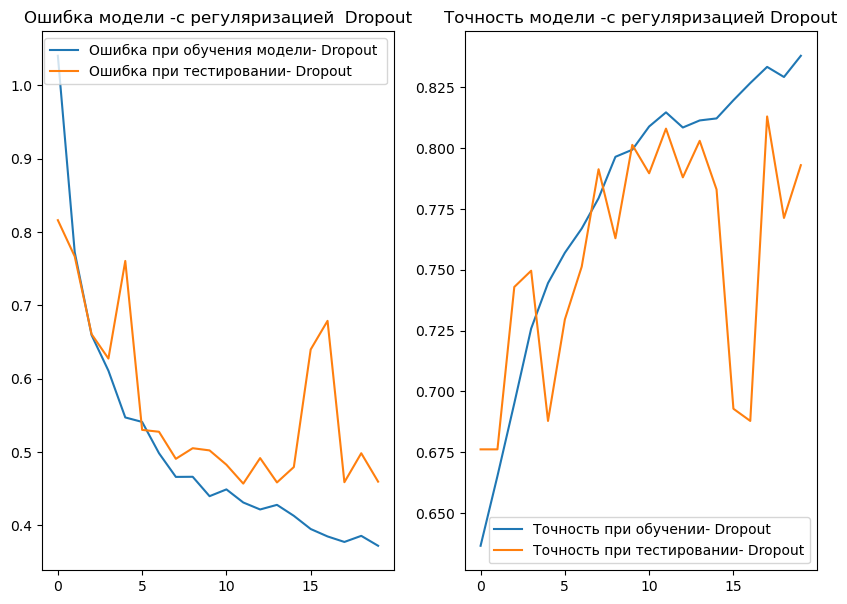

In [21]:
show_final_history(history_drop)

In [ ]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(10,7))
    ax[0].set_title('Model error - with Dropout regularization')
    ax[0].plot(history.epoch, history.history["loss"], label="Error when training model - Dropout ")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Error during testing - Dropout")
    ax[1].set_title('Model accuracy - with Dropout regularization')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Training Accuracy - Dropout ")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Test Accuracy - Dropout")
    ax[0].legend()
    ax[1].legend()

In [ ]:
show_final_history(history_drop)

Потери очень малы, а точность модели исключительно  высока. Параметры не редкие. Поэтому, если вы планируете использовать регуляризацию в своих моделях, выбирайте модели отсева.

Обычно отсев размещается на полностью связанных слоях или плотных слоях только потому, что они имеют большее количество параметров и, следовательно, они, вероятно, будут чрезмерно коадаптироваться, вызывая переобучение.

Улучшение производительности модели
Есть несколько способов улучшить производительность моделей.

Используйте меньше конв-слоев. Я использовал 4 слоя конвекций, вы можете выбрать два.
Используйте регуляризацию только на слое с самыми высокими параметрами.
Соберите больше данных.
Поздравляю с тем, что вы зашли так далеко. Надеюсь, прочитав эту статью, вы сможете лучше понять регуляризацию.Таким образом регуляризаторы наказывают параметры модели.